In [1]:
# needed imports here


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import plotly.express as px
import ast
from keras.preprocessing import sequence
import re
import string
import json
from textblob import TextBlob
from transformers import pipeline
from collections import Counter


C:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Reading Dataset


In [2]:
import pandas as pd

data = pd.read_csv("./E-commerce.csv")

In [3]:
data.head()

,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       50 non-null     int64  
 1   Age               50 non-null     int64  
 2   Gender            50 non-null     object 
 3   Location          50 non-null     object 
 4   Annual Income     50 non-null     int64  
 5   Purchase History  50 non-null     object 
 6   Browsing History  50 non-null     object 
 7   Product Reviews   50 non-null     object 
 8   Time on Site      50 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ KB


In [5]:
# checking for missing values 

data.isnull()

,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [6]:
 data.isnull().sum()

Customer ID         0
Age                 0
Gender              0
Location            0
Annual Income       0
Purchase History    0
Browsing History    0
Product Reviews     0
Time on Site        0
dtype: int64

There are no missing values, so no handling or imputation is needed.


### Data Analysis and Visualization

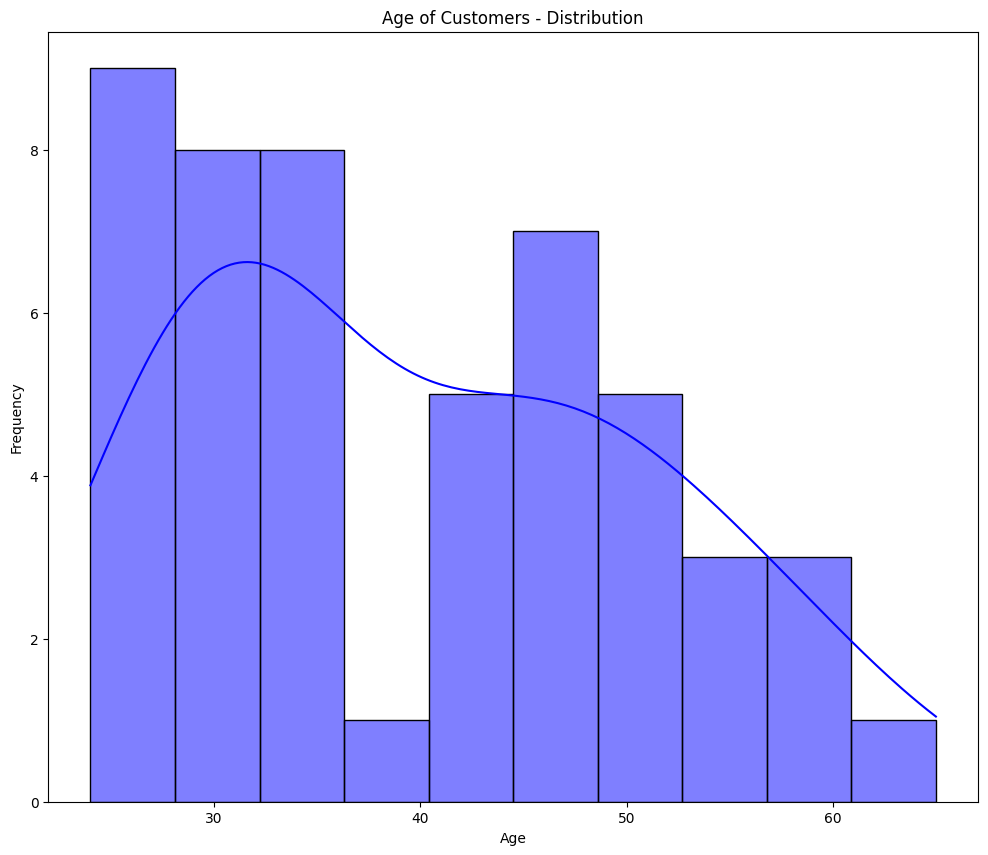

In [7]:
plt.figure(figsize=(12,10))
sns.histplot(data['Age'], bins=10, kde=True, color='blue')
plt.title('Age of Customers - Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


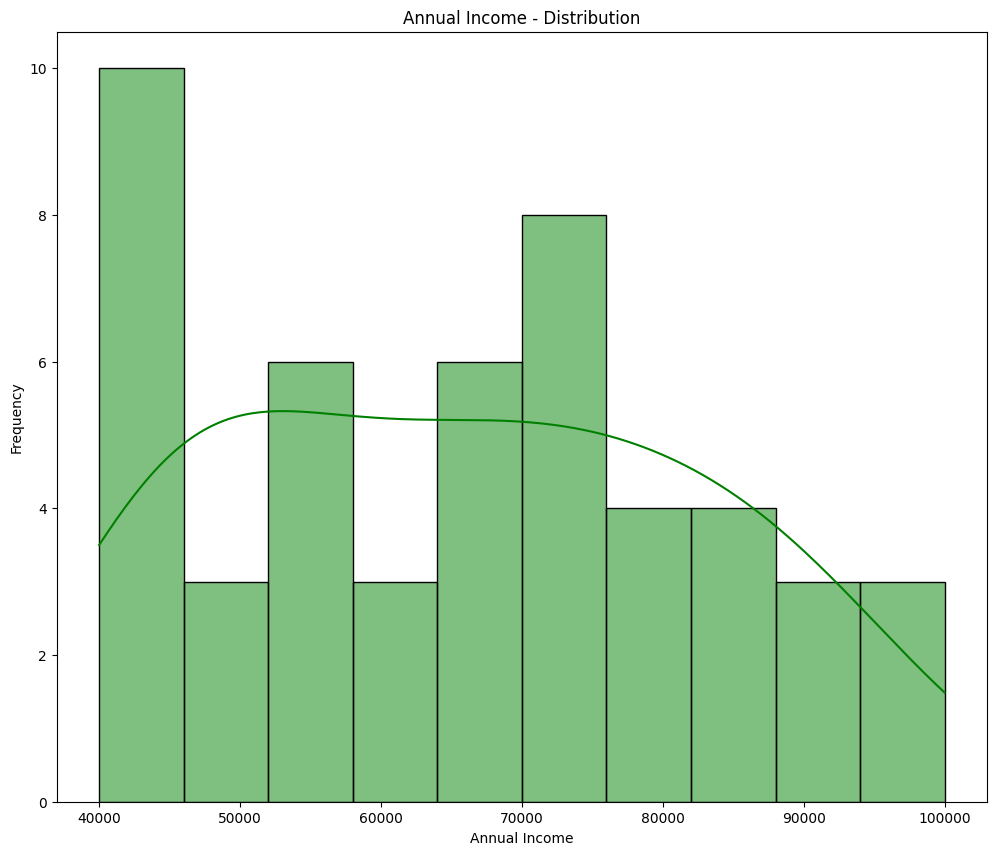

In [8]:
plt.figure(figsize=(12,10))
sns.histplot(data['Annual Income'], bins=10, kde=True, color='green')
plt.title('Annual Income - Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3336\234357426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


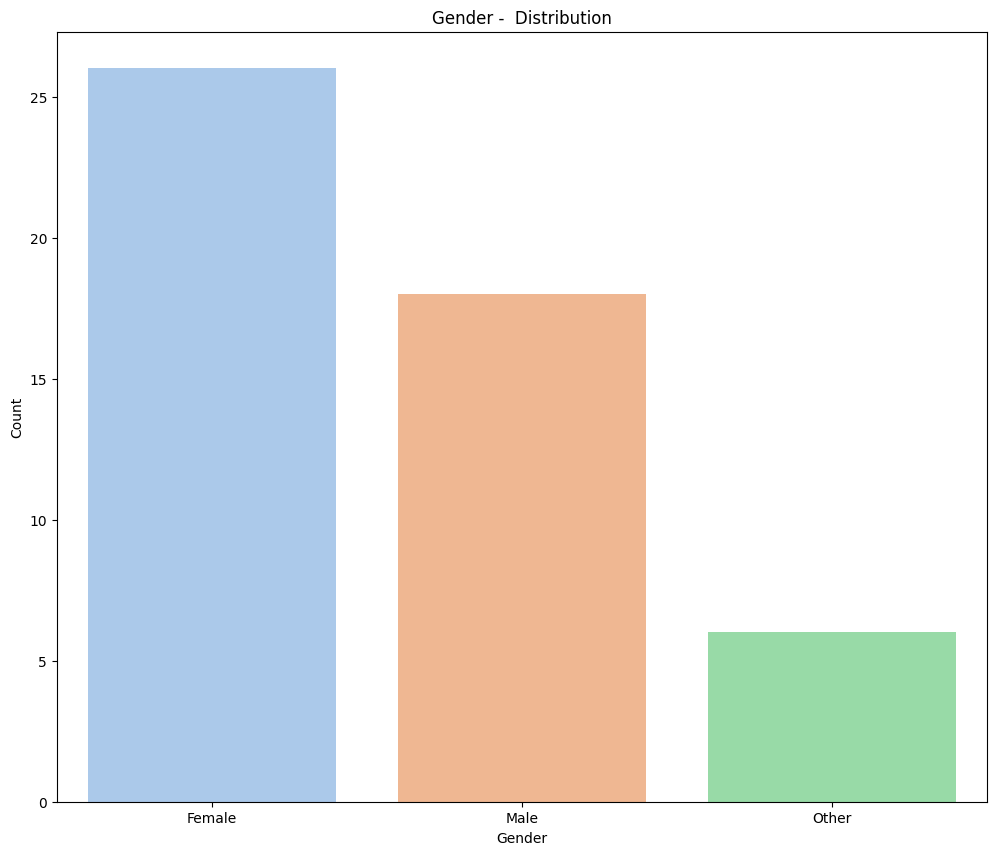

In [9]:
plt.figure(figsize=(12,10))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender -  Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [10]:
fig = px.pie(data, names='Gender', title='Customer Gender - Distribution (Pie)')
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3336\3117387581.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




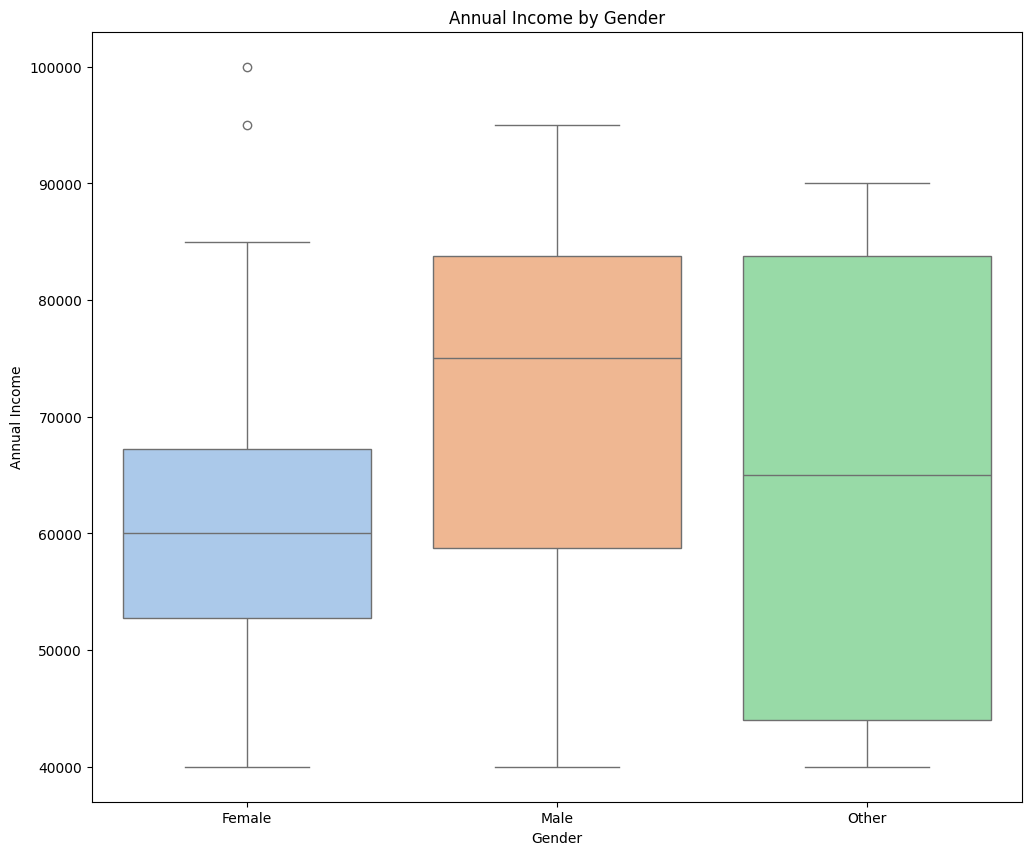

In [11]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Gender', y='Annual Income', data=data, palette='pastel')
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()

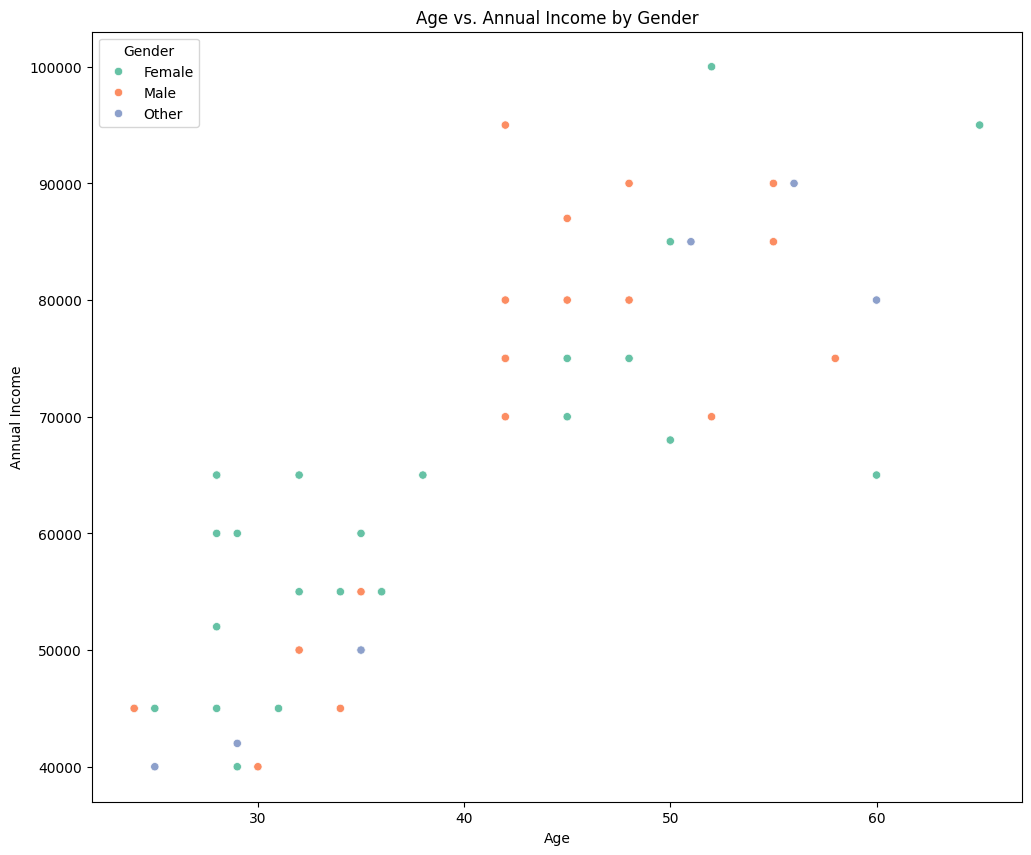

In [12]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Age', y='Annual Income', data=data, hue='Gender', palette='Set2')
plt.title('Age vs. Annual Income by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

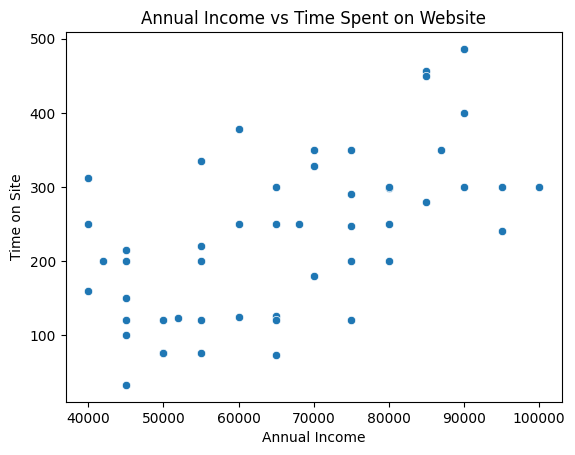

In [13]:
sns.scatterplot(x='Annual Income', y='Time on Site', data=data)
plt.title('Annual Income vs Time Spent on Website')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3336\3192023140.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




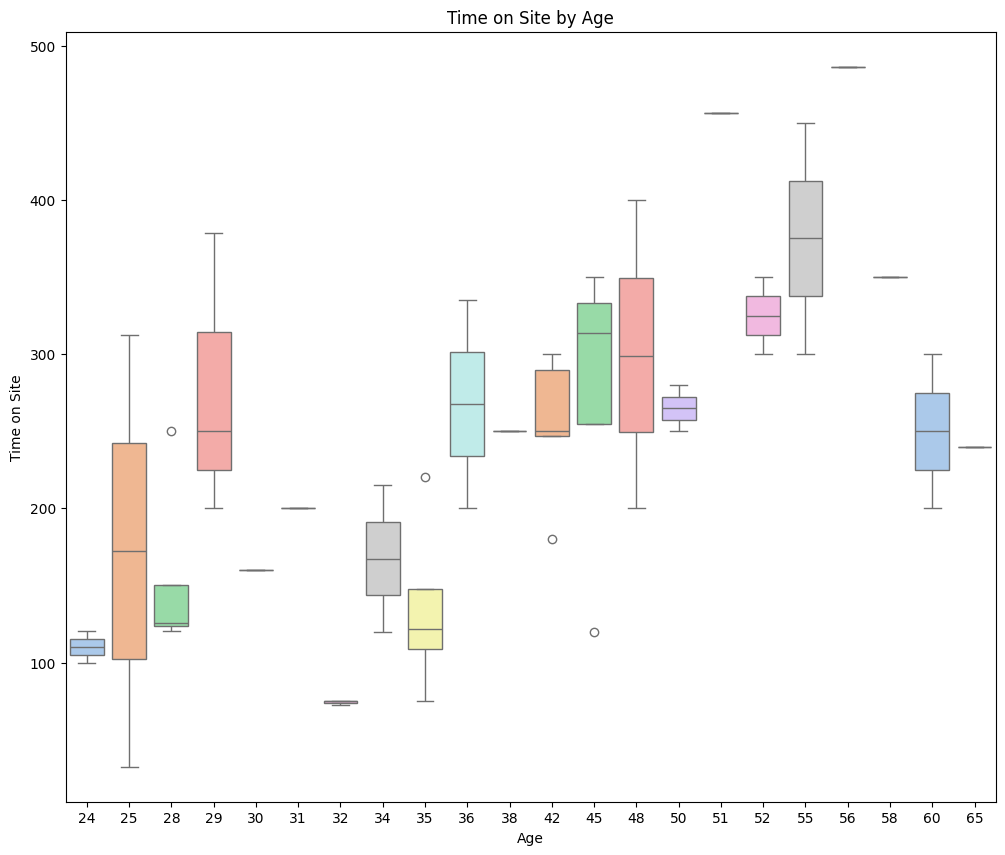

In [14]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Age', y='Time on Site', data=data, palette='pastel')
plt.title('Time on Site by Age')
plt.xlabel('Age')
plt.ylabel('Time on Site')
plt.show()

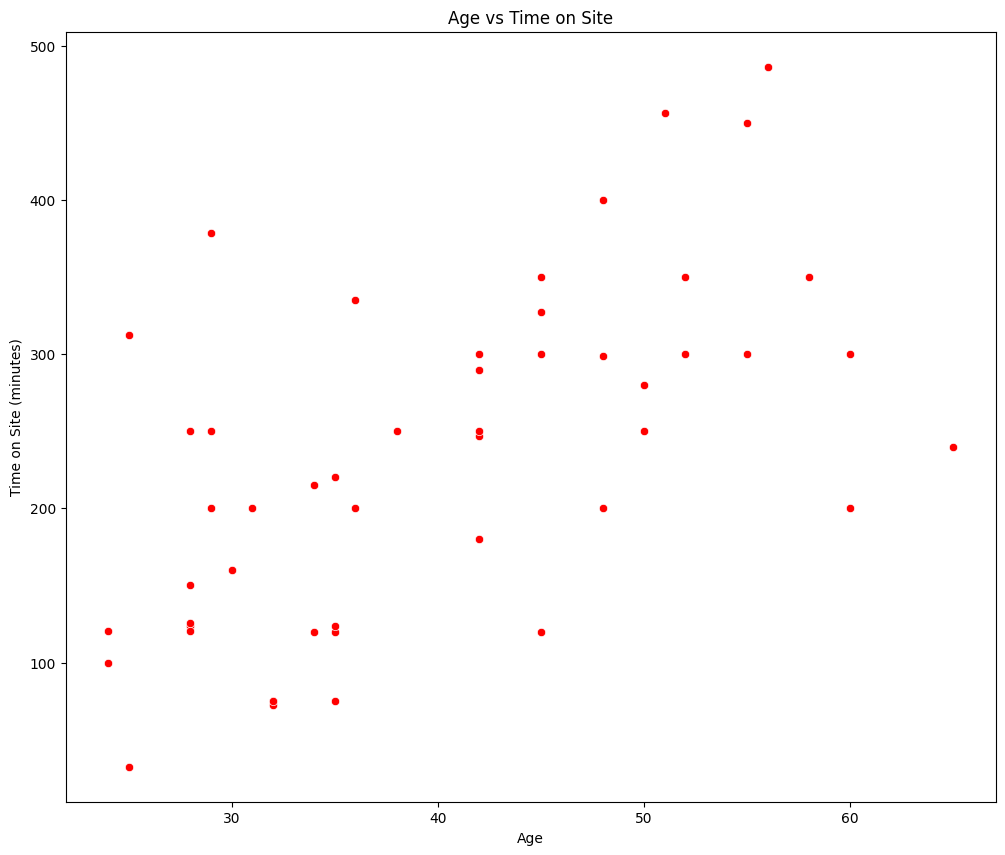

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Age', y='Time on Site', data=data, color='red')
plt.title('Age vs Time on Site')
plt.xlabel('Age')
plt.ylabel('Time on Site (minutes)')
plt.show()


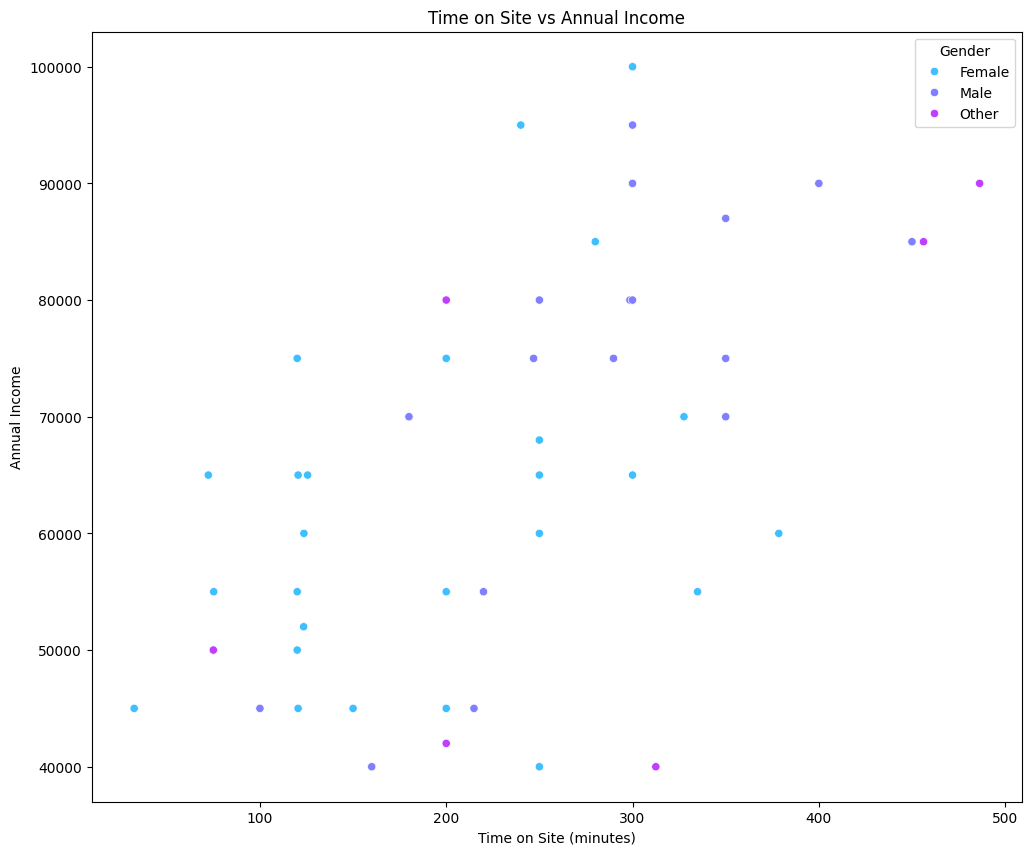

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Time on Site', y='Annual Income', hue='Gender', data=data, palette='cool')
plt.title('Time on Site vs Annual Income')
plt.xlabel('Time on Site (minutes)')
plt.ylabel('Annual Income')
plt.show()

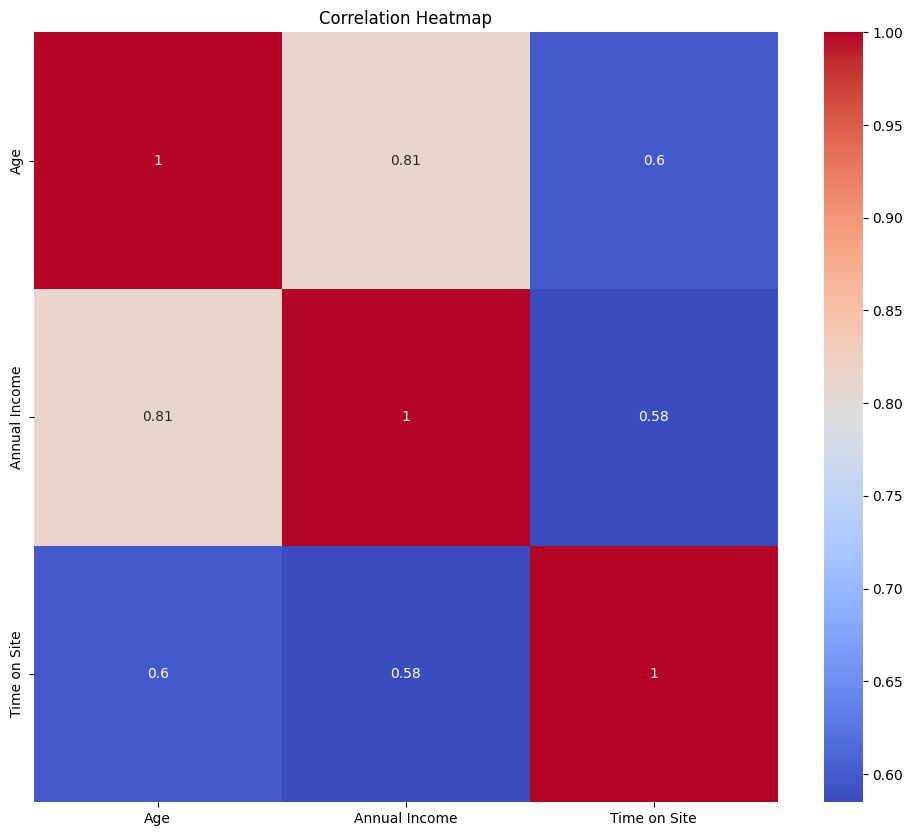

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[['Age', 'Annual Income', 'Time on Site']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [18]:
fig = px.histogram(data, x='Product Reviews', nbins=15, title='Distribution of Product Reviews', height=1500)
fig.show()

In [19]:
# How do product reviews affect purchase history?

fig = px.density_heatmap(data, x='Product Reviews', y='Purchase History', title='Relationship between Product Reviews and Purchase History', width=1500, height=1500)
fig.show()

In [20]:
# How long do customers stay on the site relative to their purchase history?

fig = px.scatter(data, x='Time on Site', y='Purchase History', color='Annual Income', title='Time on Site vs Purchase History', width=1500)
fig.show()

In [21]:
# How do customers in different locations vary in their time spent on the site?

avg_by_location = data.groupby('Location')['Time on Site'].mean().reset_index()
fig = px.bar(avg_by_location, x='Location', y='Time on Site', title='Average Time on Site by Location')
fig.show()

In [22]:
# Number of reviews affection on purchase history

fig = px.scatter(data, x='Product Reviews', y='Purchase History', title='Product Reviews vs Purchase History', width=1500, height=1500)
fig.show()

In [23]:
# time on site related to browsing history

fig = px.scatter(data, x='Time on Site', y='Browsing History', title='Time on Site vs Browsing History', width=1500)
fig.show()

In [24]:
# distribution of time on site by location


fig = px.density_heatmap(data, x='Location', y='Time on Site', z='Time on Site', title='Distribution of Time on Site by Location')
fig.show()

In [25]:
# Analize Purchase History and Annual Income by Location

fig = px.scatter(data, x='Location', y='Purchase History', size='Annual Income', color='Gender', title='Purchase History vs Location with Annual Income as Bubble Size', width=4500)
fig.show()

### Add categories for age, older if avg_age < actual age in that cell, younger if avg_age > actual age in that cell

In [26]:
avg_age = data['Age'].mean()
data['Age Group'] = np.where(data['Age'] > avg_age, 'Older', 'Younger')

In [27]:
younger_income = data[data['Age Group'] == 'Younger']['Annual Income']
older_income = data[data['Age Group'] == 'Older']['Annual Income']

In [28]:
# Younger Group

print(f"Mean income: {younger_income.mean():.2f}")
print(f"Median income: {younger_income.median():.2f}")

Mean income: 51884.62
Median income: 51000.00


In [29]:
# Older Group

print(f"Mean income: {older_income.mean():.2f}")
print(f"Median income: {older_income.median():.2f}")

Mean income: 80833.33
Median income: 80000.00


In [30]:
avg_income = data.groupby('Age Group')['Annual Income'].mean().reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3336\2769311364.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Age Group', ylabel='Annual Income'>

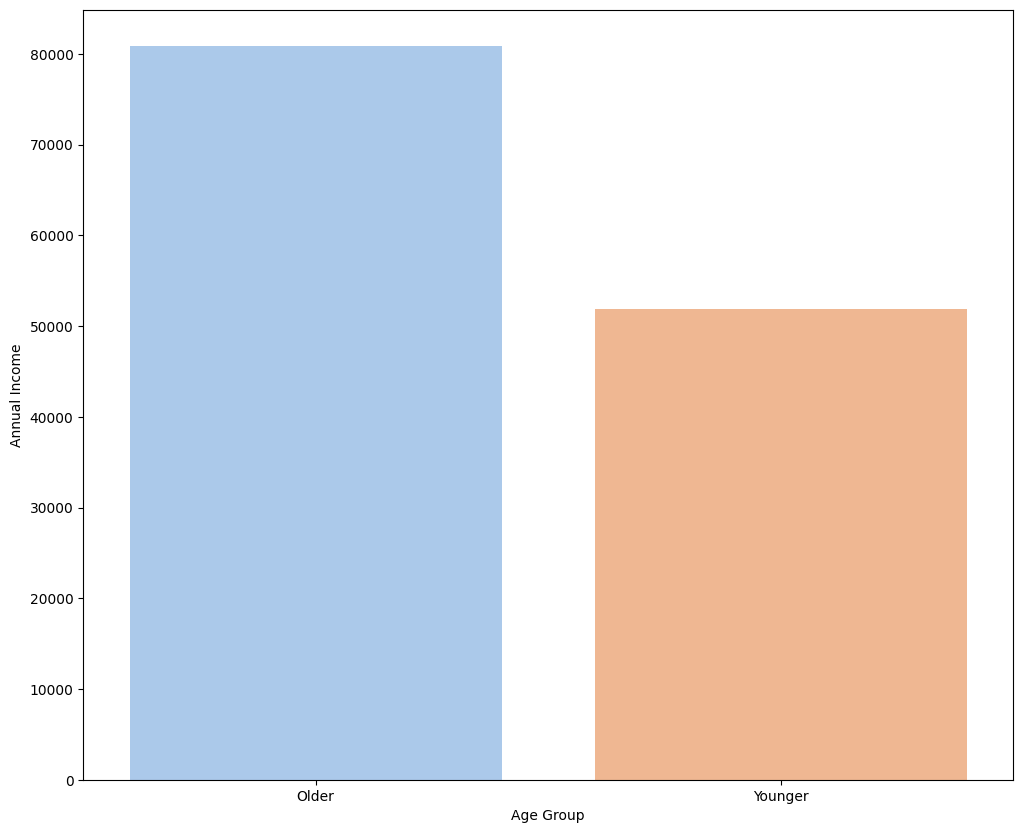

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(x='Age Group', y='Annual Income', data=avg_income, palette='pastel')


In [32]:
avg_time = data.groupby('Age Group')['Time on Site'].mean().reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3336\1696238053.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Age Group', ylabel='Time on Site'>

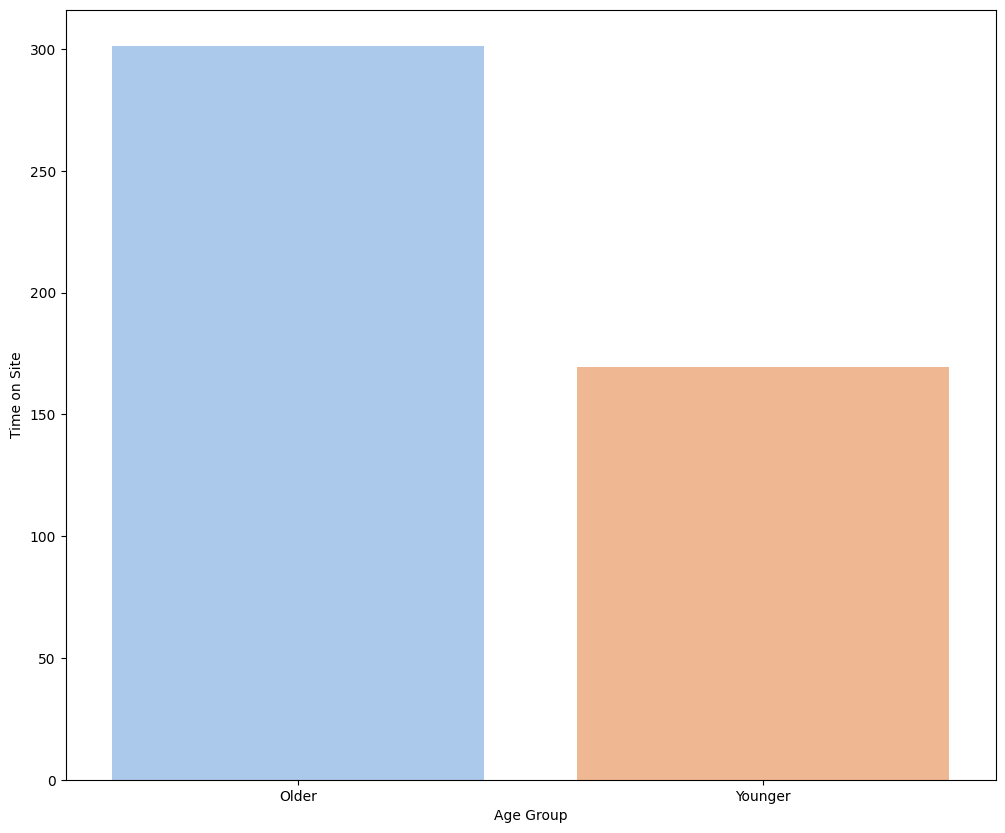

In [33]:
plt.figure(figsize=(12,10))
sns.barplot(x='Age Group', y='Time on Site', data=avg_time, palette='pastel')

In [34]:
correlation = data[['Age', 'Annual Income', 'Time on Site']].corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
                    Age  Annual Income  Time on Site
Age            1.000000       0.811277      0.597758
Annual Income  0.811277       1.000000      0.584751
Time on Site   0.597758       0.584751      1.000000


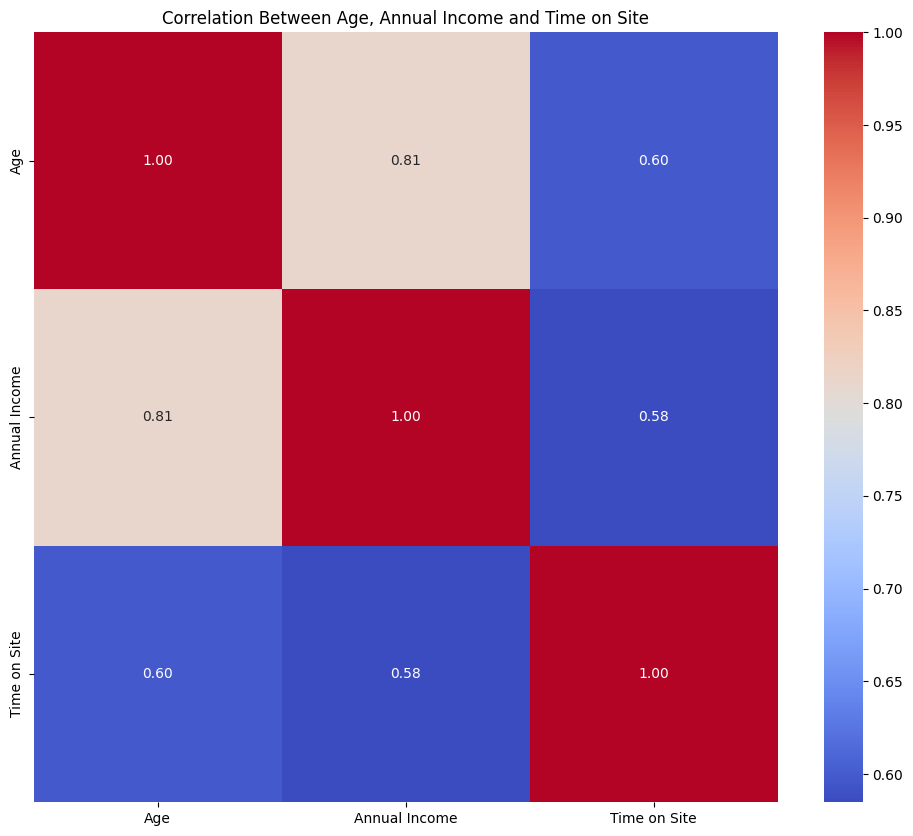

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Age, Annual Income and Time on Site')
plt.show()

In [36]:
def extract_date(x):
    if pd.notnull(x):
        try:
            record = eval(x)
            if isinstance(record, list):
                return pd.to_datetime(record[0].get('Date') or record[0].get('Purchase Date'), errors='coerce')
            elif isinstance(record, dict):
                return pd.to_datetime(record.get('Date') or record.get('Purchase Date'), errors='coerce')
        except:
            return pd.NaT
    return pd.NaT

In [37]:
data['Purchase Date'] = data['Purchase History'].apply(extract_date)

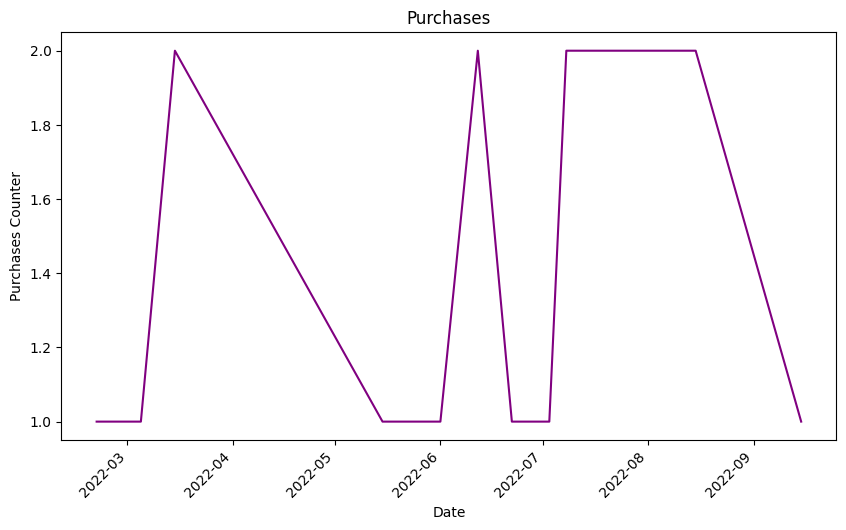

In [38]:
plt.figure(figsize=(10,6))
data.groupby('Purchase Date').size().plot(kind='line', color='purple')
plt.title('Purchases')
plt.xlabel('Date')
plt.ylabel('Purchases Counter')
plt.xticks(rotation=45)
plt.show()

In [39]:
def extract_categories(file_path, column_name):
    df = pd.read_csv(file_path)
    categories = []

    for entry in df[column_name]:
        try:
            entry = ast.literal_eval(entry)
            if isinstance(entry, list):
                for item in entry:
                    if isinstance(item, dict):
                        category = item.get("Category")
                        if category:
                            categories.append(category.strip()) 
        except (ValueError, SyntaxError):
            print(f"Could not parse entry: {entry}")

    return categories

In [40]:
file_path = './E-commerce.csv' 
column_name = 'Purchase History'

In [41]:
categories = extract_categories(file_path, column_name)

In [42]:
print(categories)

['Clothing', 'Electronics', 'Home & Garden']


In [43]:
data = pd.DataFrame(categories, columns=['Purchase History Clean'])

In [44]:
filtered_data = data[data['Purchase History Clean'].str.lower() != 'unknown']


In [45]:
filtered_data['Purchase History Clean'] = filtered_data['Purchase History Clean'].str.strip().str.lower()


In [46]:
category_counts = filtered_data['Purchase History Clean'].value_counts().reset_index()
category_counts.columns = ['Product Category', 'Count']

C:\Users\DELL\AppData\Local\Temp\ipykernel_3336\2158795000.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




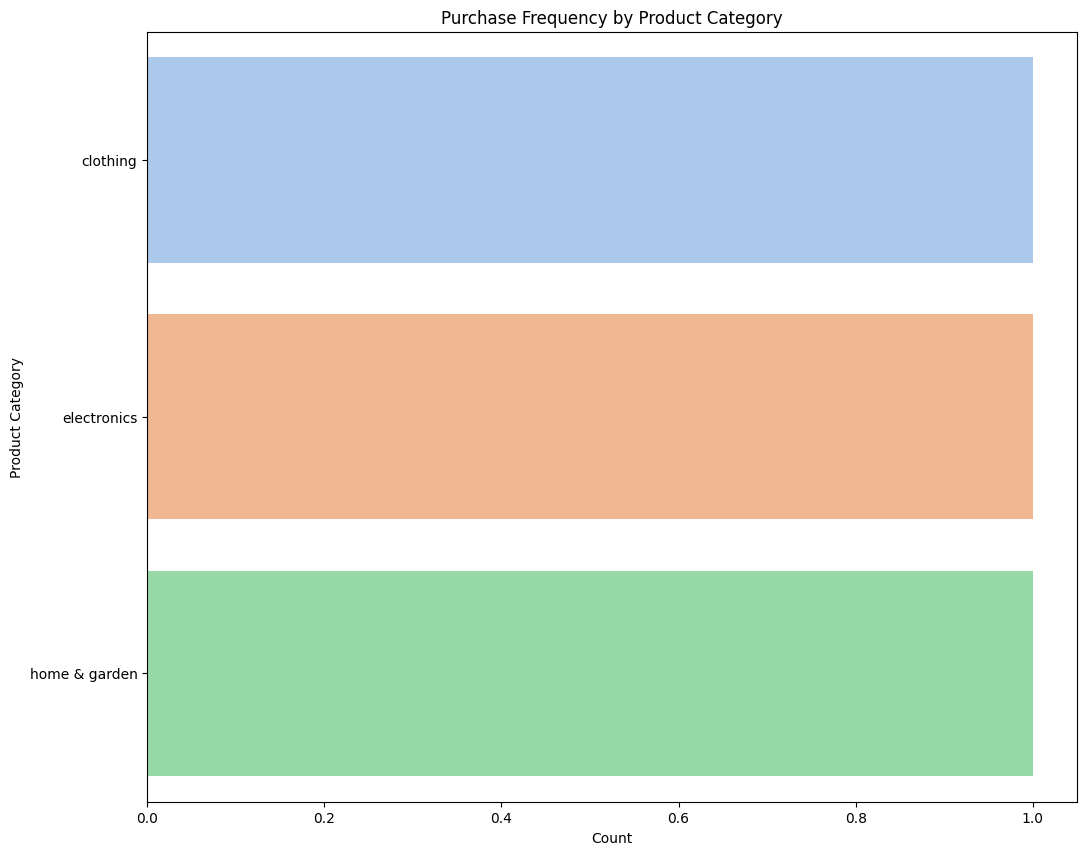

In [47]:
plt.figure(figsize=(12,10))
sns.barplot(y='Product Category', x='Count', data=category_counts, palette='pastel')
plt.title('Purchase Frequency by Product Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

In [48]:
data = pd.read_csv('./E-commerce.csv')

In [49]:
clothing_data_time = data[data['Purchase History'].str.contains('Clothing', na=False)]

<Axes: xlabel='Purchase History', ylabel='Time on Site'>

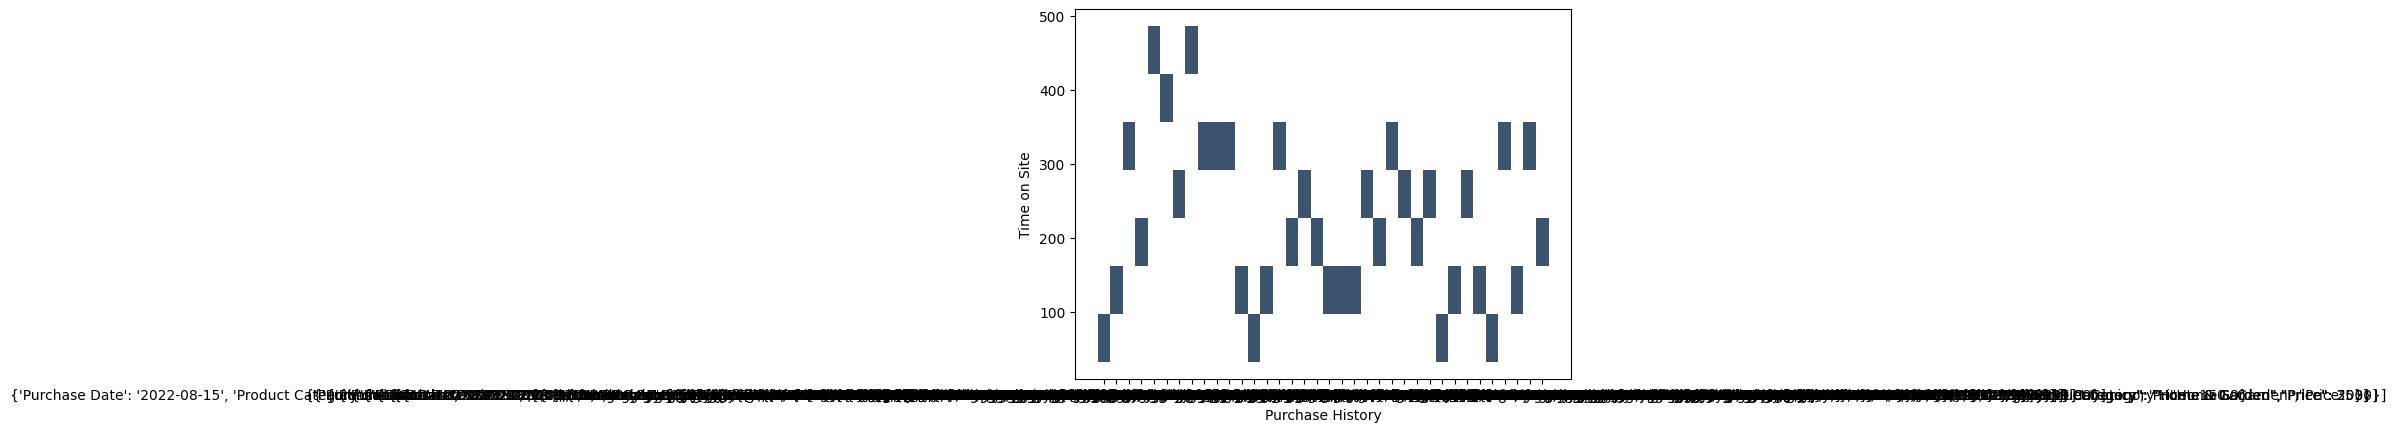

In [50]:
sns.histplot(x='Purchase History', y='Time on Site', data=clothing_data_time)

In [51]:
clothing_data_income = data[data['Purchase History'].str.contains('Clothing', na=False)]

<Axes: xlabel='Purchase History', ylabel='Annual Income'>

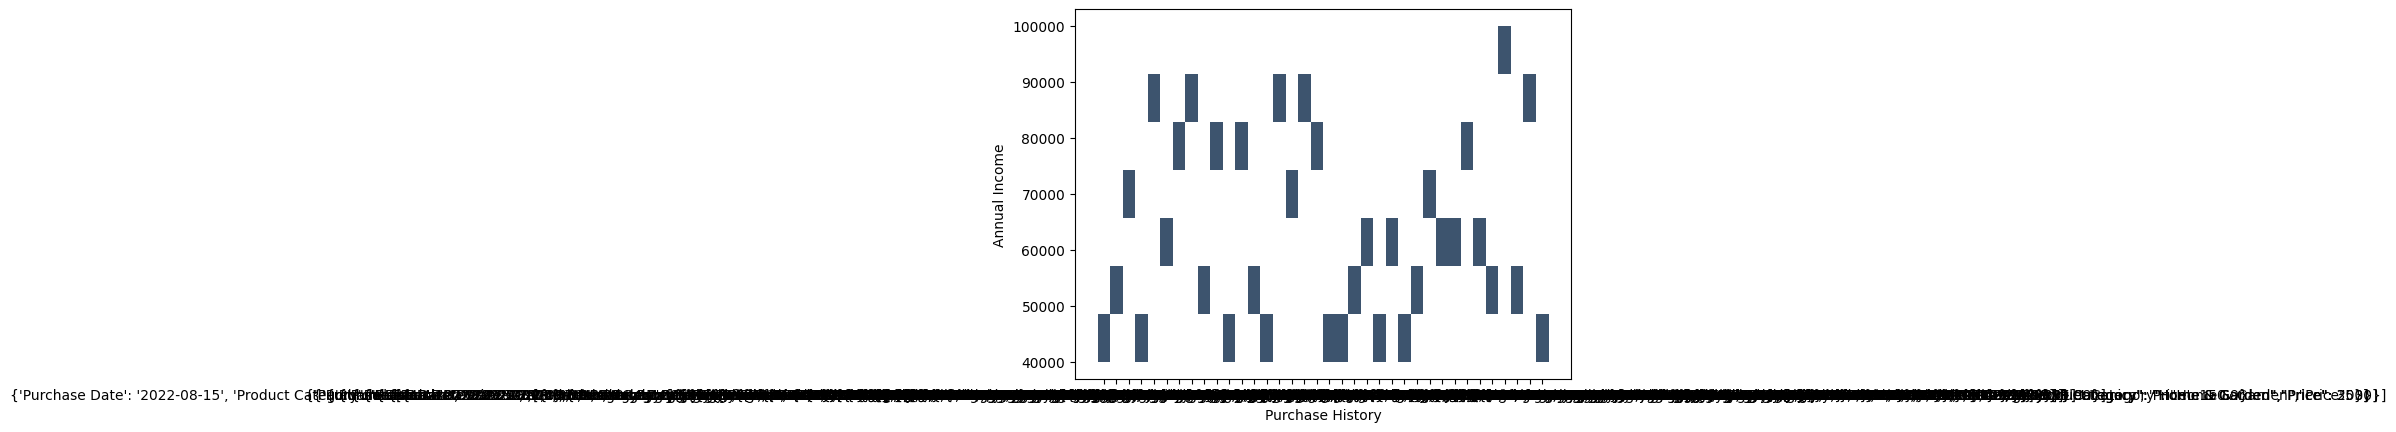

In [52]:
sns.histplot(x='Purchase History', y='Annual Income', data=clothing_data_income)

## Sentiment Analysis

In [53]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Location'] = label_encoder.fit_transform(data['Location'])

In [54]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [55]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [56]:
def remove_unwanted_phrases(text):
    text = re.sub(r'product\s+rating\s+review', '', text, flags=re.IGNORECASE)
    text = re.sub(r'review\s+text', '', text, flags=re.IGNORECASE)
    return text

In [57]:
def clean_text(text):
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_unwanted_phrases(text)
    text = text.lower()
    return text.strip()

In [58]:
data['Cleaned_Reviews'] = data['Product Reviews'].apply(clean_text)

In [59]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from textblob import TextBlob

def get_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    return {1: 'Positive', -1: 'Negative', 0: 'Neutral'}[int(polarity > 0) - int(polarity < 0)]

data['Sentiment_Textblob'] = data['Cleaned_Reviews'].apply(get_sentiment_textblob)


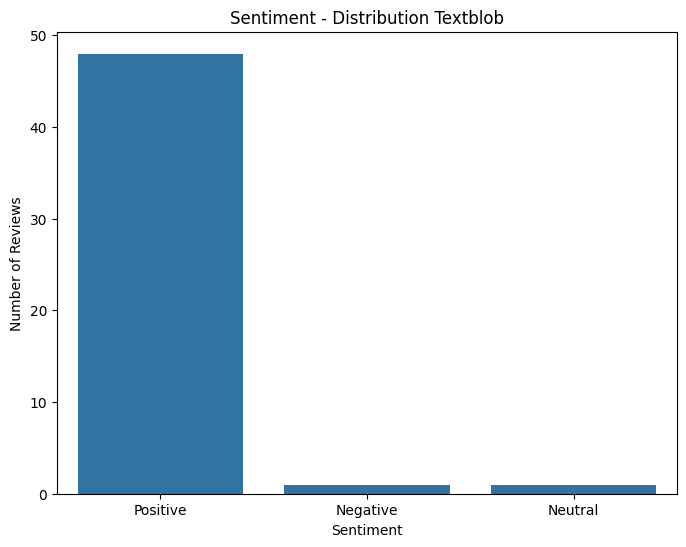

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment_Textblob', data=data)
plt.title('Sentiment - Distribution Textblob')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [62]:
sentiment_pipeline = pipeline('sentiment-analysis')

def get_sentiment_transformers(text):
    result = sentiment_pipeline(text[:512])
    return result[0]['label']

data['bert_sentiment'] = data['Cleaned_Reviews'].apply(get_sentiment_transformers)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Python311\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



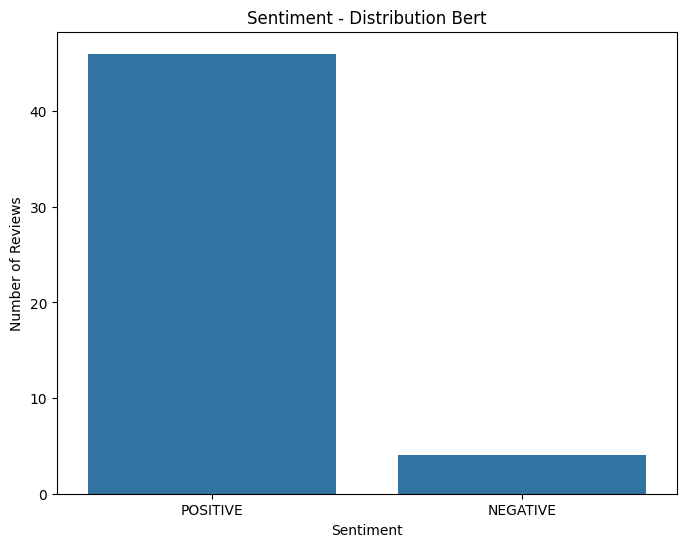

In [63]:
plt.figure(figsize=(8,6))
sns.countplot(x='bert_sentiment', data=data)
plt.title('Sentiment - Distribution Bert')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


## Train Model


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [65]:
data = pd.read_csv("./E-commerce.csv")

In [66]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Location'] = label_encoder.fit_transform(data['Location'])

We already know that there are no missing values, so there is no need for any handling.

In [68]:
features = data[['Age', 'Gender', 'Time on Site', 'Location']]

target = data['Annual Income']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [70]:
# RandomForest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [71]:
# DecisionTree

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [72]:
#XGBoost

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [73]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Performance:')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared (R2): {r2}')

In [74]:
evaluate_model(y_test, y_pred_rf, 'Random Forest')

Random Forest Performance:
Mean Absolute Error: 8842.0
Mean Squared Error: 134141640.0
Root Mean Squared Error: 11581.953203151876
R-squared (R2): 0.5198251718213058
--------


In [75]:
evaluate_model(y_test, y_pred_dt, 'Decision Tree')

Decision Tree Performance:
Mean Absolute Error: 9800.0
Mean Squared Error: 166200000.0
Root Mean Squared Error: 12891.857895586656
R-squared (R2): 0.4050687285223368
--------


In [76]:
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

XGBoost Performance:
Mean Absolute Error: 9369.5
Mean Squared Error: 169892461.68364257
Root Mean Squared Error: 13034.28025184523
R-squared (R2): 0.3918511537670297
--------
